# Back in the 00's - Do you remember the singles chart?

## load of the dataset and first analysis

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
%matplotlib inline

In [2]:
df=pd.read_csv("../assets/billboard.csv")

In [3]:
#look at first rows..
pd.set_option("display.max_columns",200)
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# How many tracks do we have?
print"Number of Tracks:",df.shape[0]

Number of Tracks: 317


In [5]:
# What types of data each column contains
df.iloc[:,:10].dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
dtype: object

The dataset represents the 317 singles that managed to enter in the top 100 chart during the year 2000.  
For each track, it is informed the artist,genre of music, date it entered in the top100 , date at the peak and for each week, its ranking in the top 100.  
At first glance, I noticed some artist managed to be in the top 100 with different songs.  
Also, to implement the analysis, I will need to convert date and length of the track into a date and a time. 



## Data Cleaning.

In [6]:
#let's rename some columns
df.rename(columns={'artist.inverted':'artist','date.entered':'Entry','date.peaked':'AtPeak'},inplace=True)
df.head()


,year,artist,track,time,genre,Entry,AtPeak,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#let's rename x1st.week type to week 1 and so on..

week=df.columns[7:]
week_dic={}
for i in range(len(week)):
    week_dic[week[i]]=str(i+1)

In [8]:
df.rename(columns=week_dic,inplace=True)
df.head()

,year,artist,track,time,genre,Entry,AtPeak,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Do we have missing value regarding first 6 columns?

nan_val=df.iloc[:,:7].apply(lambda x: x.isnull().sum())
nan_val

year      0
artist    0
track     0
time      0
genre     0
Entry     0
AtPeak    0
dtype: int64

We don't have NaN value for those columns!

In [10]:
#do we have week where a track has been out of the top100 (or missed value? )and come back after?

def miss_rank(row):
    missval=row
    while pd.isnull(missval[-1]) == True:# while our last value is NaN we withdraw the last value
        missval=missval[:-1]
    isnull=pd.isnull(missval).sum()  # How many True value do we have
    return isnull #if count is not =0 it means we still have NaN value between 2 ranking at least.


missing_row=df.loc[df.apply(miss_rank,axis=1)>0,:] # apply the function to each row and keep only the row with missing value
print "We 've got %d tracks that went out top 100 between 2 ranking"%len(missing_row)
missing_row

We 've got 15 tracks that went out top 100 between 2 ranking


,year,artist,track,time,genre,Entry,AtPeak,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,39.0,38.0,33.0,29.0,29.0,32.0,27.0,26.0,24.0,27.0,32.0,33.0,35.0,35.0,40.0,43.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,45.0,45.0,23.0,17.0,14.0,17.0,18.0,18.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0,5.0,6.0,8.0,9.0,10.0,12.0,15.0,20.0,22.0,22.0,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,81,77.0,73.0,63.0,61.0,58.0,56.0,52.0,56.0,57.0,57.0,57.0,57.0,57.0,60.0,61.0,61.0,57.0,60.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,41.0,34.0,28.0,25.0,23.0,22.0,16.0,16.0,18.0,14.0,13.0,13.0,11.0,11.0,9.0,9.0,7.0,7.0,9.0,9.0,12.0,14.0,16.0,17.0,17.0,21.0,26.0,29.0,32.0,39.0,39.0,43.0,47.0,50.0,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2000,Lil Bow Wow,Bounce With Me,3:22,Rap,2000-08-19,2000-09-16,48,35.0,24.0,24.0,20.0,20.0,20.0,20.0,22.0,27.0,27.0,36.0,40.0,53.0,61.0,69.0,80.0,90.0,99.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2000,"Moore, Mandy",I Wanna Be With You,4:12,Pop,2000-06-17,2000-08-12,69,63.0,54.0,50.0,45.0,42.0,31.0,28.0,24.0,34.0,42.0,53.0,65.0,66.0,77.0,94.0,99.0,NaN,NaN,NaN,NaN,93.0,91.0,91.0,90.0,89.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,2000,"Strait, George",Go On,3:48,Country,2000-08-26,2000-10-28,71,67.0,63.0,56.0,53.0,48.0,46.0,46.0,44.0,40.0,44.0,46.0,49.0,56.0,56.0,71.0,78.0,88.0,95.0,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,2000,Amber,Sexual (Li Da Di),4:38,Rock,1999-07-17,2000-02-12,99,99.0,96.0,96.0,100.0,93.0,93.0,96.0,NaN,NaN,99.0,NaN,96.0,96.0,99.0,98.0,98.0,NaN,95.0,88.0,88.0,79.0,76.0,69.0,69.0,59.0,58.0,58.0,49.0,44.0,42.0,46.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,2000,"Jackson, Alan",Pop A Top,3:04,Country,1999-11-13,2000-01-22,79,73.0,70.0,64.0,63.0,57.0,55.0,55.0,63.0,52.0,43.0,47.0,55.0,78.0,95.0,100.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,2000,"Lopez, Jennifer",Feelin' Good,4:28,Latin,2000-02-19,2000-04-08,79,79.0,66.0,54.0,54.0,54.0,54.0,51.0,61.0,79.0,96.0,NaN,NaN,64.0,74.0,73.0,79.0,82.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,2000,"Gill, Vince",Feels Like Love,4:13,Country,2000-09-02,2000-11-18,82,76.0,74.0,73.0,73.0,65.0,59.0,58.0,54.0,54.0,53.0,52.0,55.0,52.0,57.0,76.0,91.0,99.0,NaN,91.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,2000,"Houston, Whitney",Could I Have This Kiss Forever,3:54,Rock,2000-06-17,2000-08-05,74,68.0,68.0,67.0,59.0,59.0,60.0,52.0,54.0,56.0,59.0,70.0,69.0,81.0,87.0,95.0,98.0,1

As it is only 15 tracks over 317, and those tracks did not went so well, removing those tracks from the study will have a very small impact.

In [11]:
row_to_delete=list(missing_row.index)
df=df.drop(row_to_delete,axis=0)

In [12]:
# Now our row are deleted, let's reindex our dataframe.
df=df.reset_index(drop=True)
df.loc[:11]

,year,artist,track,time,genre,Entry,AtPeak,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,30.0,29.0,22.0,15.0,10.0,10.0,5.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,7.0,8.0,20.0,25.0,37.0,40.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,38.0,16.0,13.0,16.0,16.0,16.0,18.0,17.0,14.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,7.0,10.0,13.0,14.0,18.0,23.0,23.0,34.0,37.0,43.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,23.0,17.0,12.0,9.0,8.0,8.0,6.0,5.0,4.0,1.0,1.0,1.0,3.0,11.0,14.0,24.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,61.0,61.0,55.0,2.0,1.0,1.0,2.0,2.0,4.0,5.0,5.0,7.0,8.0,10.0,10.0,9.0,14.0,17.0,20.0,25.0,31.0,32.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,N'Sync,It's Gonna Be Me,3:10,Rock,2000-05-06,2000-07-29,82,70.0,51.0,39.0,26.0,19.0,15.0,9.0,7.0,7.0,5.0,4.0,1.0,1.0,3.0,4.0,6.0,10.0,13.0,15.0,18.0,23.0,28.0,38.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [13]:
import datetime as dt

In [14]:
def transform_time_to_sec(element):
    min_sec=dt.datetime.strptime(str(element),"%M:%S")
    sec=min_sec.minute*60+min_sec.second
    return sec

In [15]:
#change type of the time column

df["time"]=df["time"].apply(transform_time_to_sec)
df.rename(columns={'time':'length_s'},inplace=True)
df.head()


,year,artist,track,length_s,genre,Entry,AtPeak,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#let's change EntryDate and TopDate to a proper date
df["Entry"]=pd.to_datetime(df.Entry)
df["AtPeak"]=pd.to_datetime(df.AtPeak)
print df.iloc[:,:10].dtypes
df.head()

year                 int64
artist              object
track               object
length_s             int64
genre               object
Entry       datetime64[ns]
AtPeak      datetime64[ns]
1                    int64
2                  float64
3                  float64
dtype: object


,year,artist,track,length_s,genre,Entry,AtPeak,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
columns=list(df.columns)
melt_df=pd.melt(df, id_vars=columns[:7], value_vars=columns[7:],\
             var_name='Week', value_name='Ranking')
melt_df.head()

,year,artist,track,length_s,genre,Entry,AtPeak,Week,Ranking
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,1,57.0


In [18]:
#let's delete row with NaN values.
melt_df.dropna(inplace=True)
melt_df.tail()

,year,artist,track,length_s,genre,Entry,AtPeak,Week,Ranking
15123,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,51,42.0
15418,2000,"Hill, Faith",Breathe,244,Rap,1999-11-06,2000-04-22,52,48.0
15425,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,52,42.0
15720,2000,"Hill, Faith",Breathe,244,Rap,1999-11-06,2000-04-22,53,47.0
15727,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,53,49.0


In [19]:
melt_df.dtypes

year                 int64
artist              object
track               object
length_s             int64
genre               object
Entry       datetime64[ns]
AtPeak      datetime64[ns]
Week                object
Ranking            float64
dtype: object

In [20]:
#Change week type to int
melt_df["Week"]=melt_df["Week"].astype('int')

In [21]:
# Import as pdf
import csv

header=list(melt_df.columns)
new_list=melt_df.values.tolist()
# create a new csv file
with open("top100_clean.csv",'wb') as f:
    wr=csv.writer(f, delimiter=",",quotechar='|', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    wr.writerow(header)
    for row in new_list:
        wr.writerow(row)

## Data Visualization

**Let's try to give some insights on the following topics:**  

### 1. Top 100 distribution.
    * What is the distribution in the top 100 by Genre?
    * How long does a track stay in the top 100?
    * When does a track at its top?
    * Who flood the chart in the 00's?
    * What about the length of song in the top 100?

### 2. Number 1!
    * what Music genre brought the more number 1?
    * What tracks stay longer in the top 11
    * What track is the quicker to be number 1?


In [22]:
import seaborn as sns
%matplotlib inline

### Top 100
---

In [23]:
# What is the distribution in the top 100 by genre?
week1=melt_df.loc[melt_df["Week"]==1,:]
pivot_table1=pd.pivot_table(week1,index=["genre"],values=["length_s"],\
                            aggfunc=[np.count_nonzero,lambda x: round(100*np.count_nonzero(x)/len(week1),1)])
pivot_table1.rename(columns={'length_s': '','count_nonzero':'count',"<lambda>":'%'}, inplace=True)
col_pivot=list(pivot_table1.columns)
pivot_table1.sort(columns=col_pivot[0][0],ascending=False,inplace=True,axis=0)
pivot_table1

/Users/dorian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,count,%
,,
genre,,
Rock,133,44.0
Country,68,22.5
Rap,56,18.5
R&B,23,7.6
Latin,8,2.6
Pop,7,2.3
Electronica,4,1.3
Gospel,1,0.3


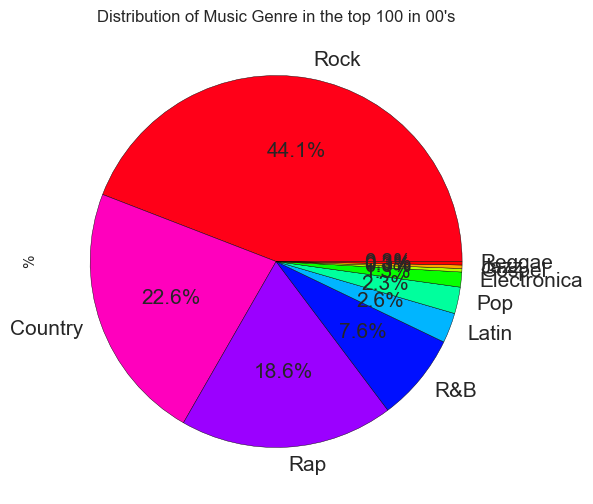

In [24]:
pivot_table1[col_pivot[1][0]].plot.pie(\
                autopct='%1.1f%%', colormap='hsv_r', fontsize=15, figsize=(6, 6),\
                                       title='Distribution of Music Genre in the top 100 in 00\'s')
plt.show()

Rock, Country and Rap music genres represent 85% of the tracks in the top 100 with Rocks genre representing almost half of it!

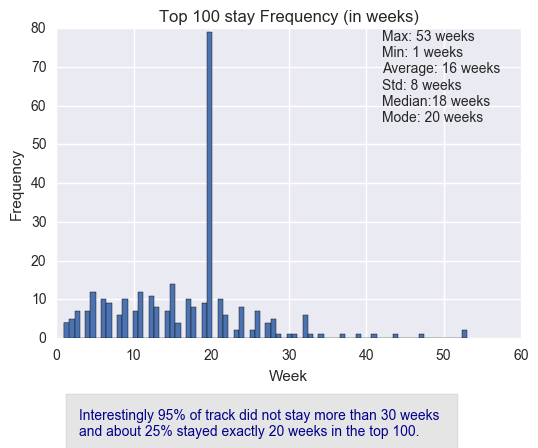

In [25]:
# How long does a track stay in the top 100?
week_stay=melt_df.groupby(["track"])['Week'].max()
Median_Stay=np.median(week_stay)
Mean_Stay=np.mean(week_stay)
Max_Stay=np.max(week_stay)
Min_Stay=np.min(week_stay)
Mode =week_stay.mode()
std=np.std(week_stay)
week_stay.plot.hist(bins=76,title='Top 100 stay Frequency (in weeks)')
plt.annotate('Max: %d weeks\nMin: %d weeks\nAverage: %d weeks\nStd: %d weeks\nMedian:%d weeks\nMode: %d weeks'%\
             (Max_Stay,Min_Stay,Mean_Stay,std,Median_Stay,Mode),\
             xy=(0.70, 0.70), xycoords='axes fraction')
plt.xlabel('Week')
plt.text(3, -25, 'Interestingly 95% of track did not stay more than 30 weeks \nand about 25% \
stayed exactly 20 weeks in the top 100.', \
         color='Darkblue',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':10})
plt.show()

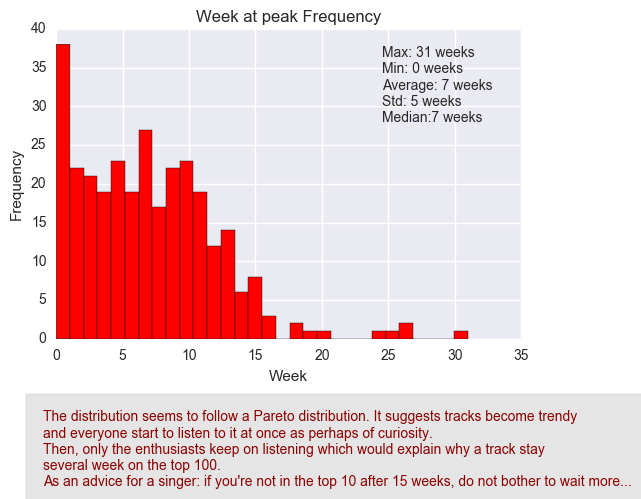

In [26]:
#When does a track at its peak after its entry in the top 100?
melt_df["time_to_top"]= melt_df["AtPeak"]-melt_df["Entry"] #calculate the number of days between entry date and peaked date
melt_df["time_to_top"]= melt_df["time_to_top"].astype('timedelta64[W]') #convert to week number

TopWeek=melt_df.groupby(['track','artist'])['time_to_top'].mean()

Median_top=np.median(TopWeek)
Mean_top=np.mean(TopWeek)
Max_top=np.max(TopWeek)
Min_top=np.min(TopWeek)
std_top=np.std(TopWeek)

TopWeek.plot.hist(bins=30,title='Week at peak Frequency',color='r')
plt.annotate('Max: %d weeks\nMin: %d weeks\nAverage: %d weeks\nStd: %d weeks\nMedian:%d weeks'%\
             (Max_top,Min_top,Mean_top,std_top,Median_top),\
             xy=(0.70, 0.70), xycoords='axes fraction')
plt.xlabel('Week')
plt.text(-1, -19, 'The distribution seems to follow a Pareto distribution. It suggests tracks become trendy\n\
and everyone start to listen to it at once as perhaps of curiosity.\n\
Then, only the enthusiasts keep on listening which would explain why a track stay \nseveral week on the top 100.\n\
As an advice for a singer: if you\'re not in the top 10 after 15 weeks, do not bother to wait more...', \
         color='Darkred',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':12})
plt.show()


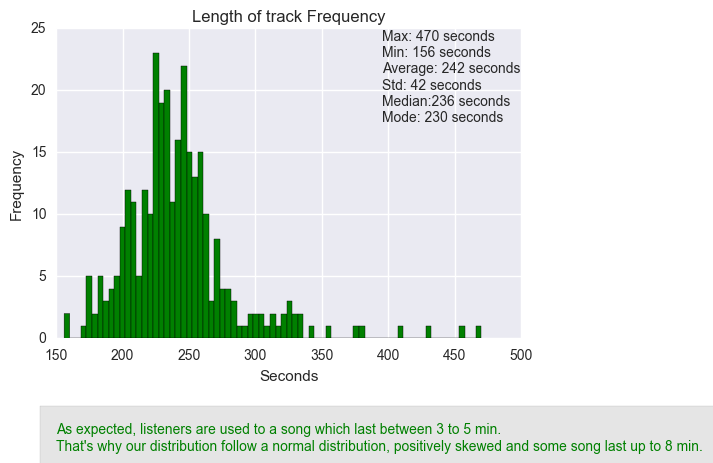

In [27]:
# What about the length of a track in the top 100?
LengthSong=melt_df.groupby(['track'])['length_s'].mean()

Median_len=np.median(LengthSong)
Mean_len=np.mean(LengthSong)
Max_len=np.max(LengthSong)
Min_len=np.min(LengthSong)
std_len=np.std(LengthSong)
Mode_len=LengthSong.mode()

LengthSong.plot.hist(bins=75,title='Length of track Frequency',color='g')
plt.annotate('Max: %d seconds\nMin: %d seconds\nAverage: %d seconds\nStd: %d seconds\nMedian:%d seconds\n\
Mode: %d seconds'\
             %(Max_len,Min_len,Mean_len,std_len,Median_len,Mode_len),\
             xy=(0.70, 0.70), xycoords='axes fraction')
plt.xlabel('Seconds')
plt.text(150, -9, 'As expected, listeners are used to a song which last between 3 to 5 min.\n\
That\'s why our distribution follow a normal distribution, positively skewed and some song last up to 8 min.', \
         color='green',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':12})
plt.show()

/Users/dorian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


19 artists added more than 2 tracks in the top 100whom Jay-Z and The Dixie Chicks with respectively 5 and 4 tracks that year!


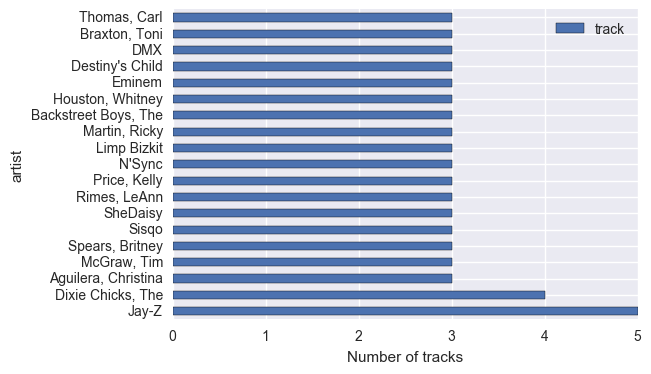

In [28]:
#Who flood the chart in the 00's?
table=pd.pivot_table(df,index=["artist"],values=["track"],aggfunc=np.count_nonzero)
table=table.loc[table["track"]>2]
table.sort(columns=["track"],ascending=False,inplace=True)
print "%d artists added more than 2 tracks in the top 100\
whom Jay-Z and The Dixie Chicks with respectively 5 and 4 tracks that year!"%(len(table))
table.plot(kind='barh')
plt.xlabel('Number of tracks')
plt.show()

### Number ones
---

In [29]:
#Select only the tracks which reached ranking number 1
Number1=melt_df.loc[melt_df["Ranking"]==1,:]
del Number1["Entry"]
del Number1["AtPeak"]
Number1.reset_index(drop=True,inplace=True)
Number1.head()

,year,artist,track,length_s,genre,Week,Ranking,time_to_top
0,2000,Madonna,Music,225,Rock,6,1.0,5.0
1,2000,Madonna,Music,225,Rock,7,1.0,5.0
2,2000,Madonna,Music,225,Rock,8,1.0,5.0
3,2000,Sisqo,Incomplete,232,Rock,8,1.0,7.0
4,2000,"Aguilera, Christina",What A Girl Wants,198,Rock,8,1.0,7.0


In [30]:
# Count of number of weeks at Number1
Most_num1=pd.pivot_table(Number1,index=["track"],values="Ranking",aggfunc=np.count_nonzero)
Most_num1

track
Be With You                               3.0
Bent                                      1.0
Come On Over Baby (All I Want Is You)     4.0
Doesn't Really Matter                     3.0
Everything You Want                       1.0
I Knew I Loved You                        4.0
Incomplete                                2.0
Independent Women Part I                 11.0
It's Gonna Be Me                          2.0
Maria, Maria                             10.0
Music                                     4.0
Say My Name                               3.0
Thank God I Found You                     1.0
Try Again                                 1.0
What A Girl Wants                         2.0
With Arms Wide Open                       1.0
Name: Ranking, dtype: float64

In [31]:
#Adding new column with the count of week at Number1
Number1["Length_at_1"]=Number1["track"].apply(lambda x: Most_num1.loc[Most_num1.index==x][0])
#Adding a new column with the length stay at top 100
Number1["Length_at_top_100"]=Number1["track"].apply(lambda x: week_stay.loc[week_stay.index==x][0])
Number1=Number1.drop_duplicates(subset=["track"]) #deleting duplicate rows
del Number1["Week"]
Number1.sort(columns=["Length_at_1"],ascending=False,inplace=True) #sort by number of week at number1
Number1.set_index(Number1['track'],inplace=True)
del Number1["track"]

/Users/dorian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/dorian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dorian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [32]:
Number1

,year,artist,length_s,genre,Ranking,time_to_top,Length_at_1,Length_at_top_100
track,,,,,,,,
Independent Women Part I,2000,Destiny's Child,218,Rock,1.0,8.0,11.0,28
"Maria, Maria",2000,Santana,258,Rock,1.0,8.0,10.0,26
Music,2000,Madonna,225,Rock,1.0,5.0,4.0,24
Come On Over Baby (All I Want Is You),2000,"Aguilera, Christina",218,Rock,1.0,10.0,4.0,21
I Knew I Loved You,2000,Savage Garden,247,Rock,1.0,14.0,4.0,33
Doesn't Really Matter,2000,Janet,257,Rock,1.0,10.0,3.0,24
Say My Name,2000,Destiny's Child,271,Rock,1.0,12.0,3.0,32
Be With You,2000,"Iglesias, Enrique",216,Latin,1.0,12.0,3.0,20
Incomplete,2000,Sisqo,232,Rock,1.0,7.0,2.0,26


As it appears,Jay-Z and The Dixie Chicks, although with 5 and 4 tracks in the chart that year, they never managed to reach the top 1!

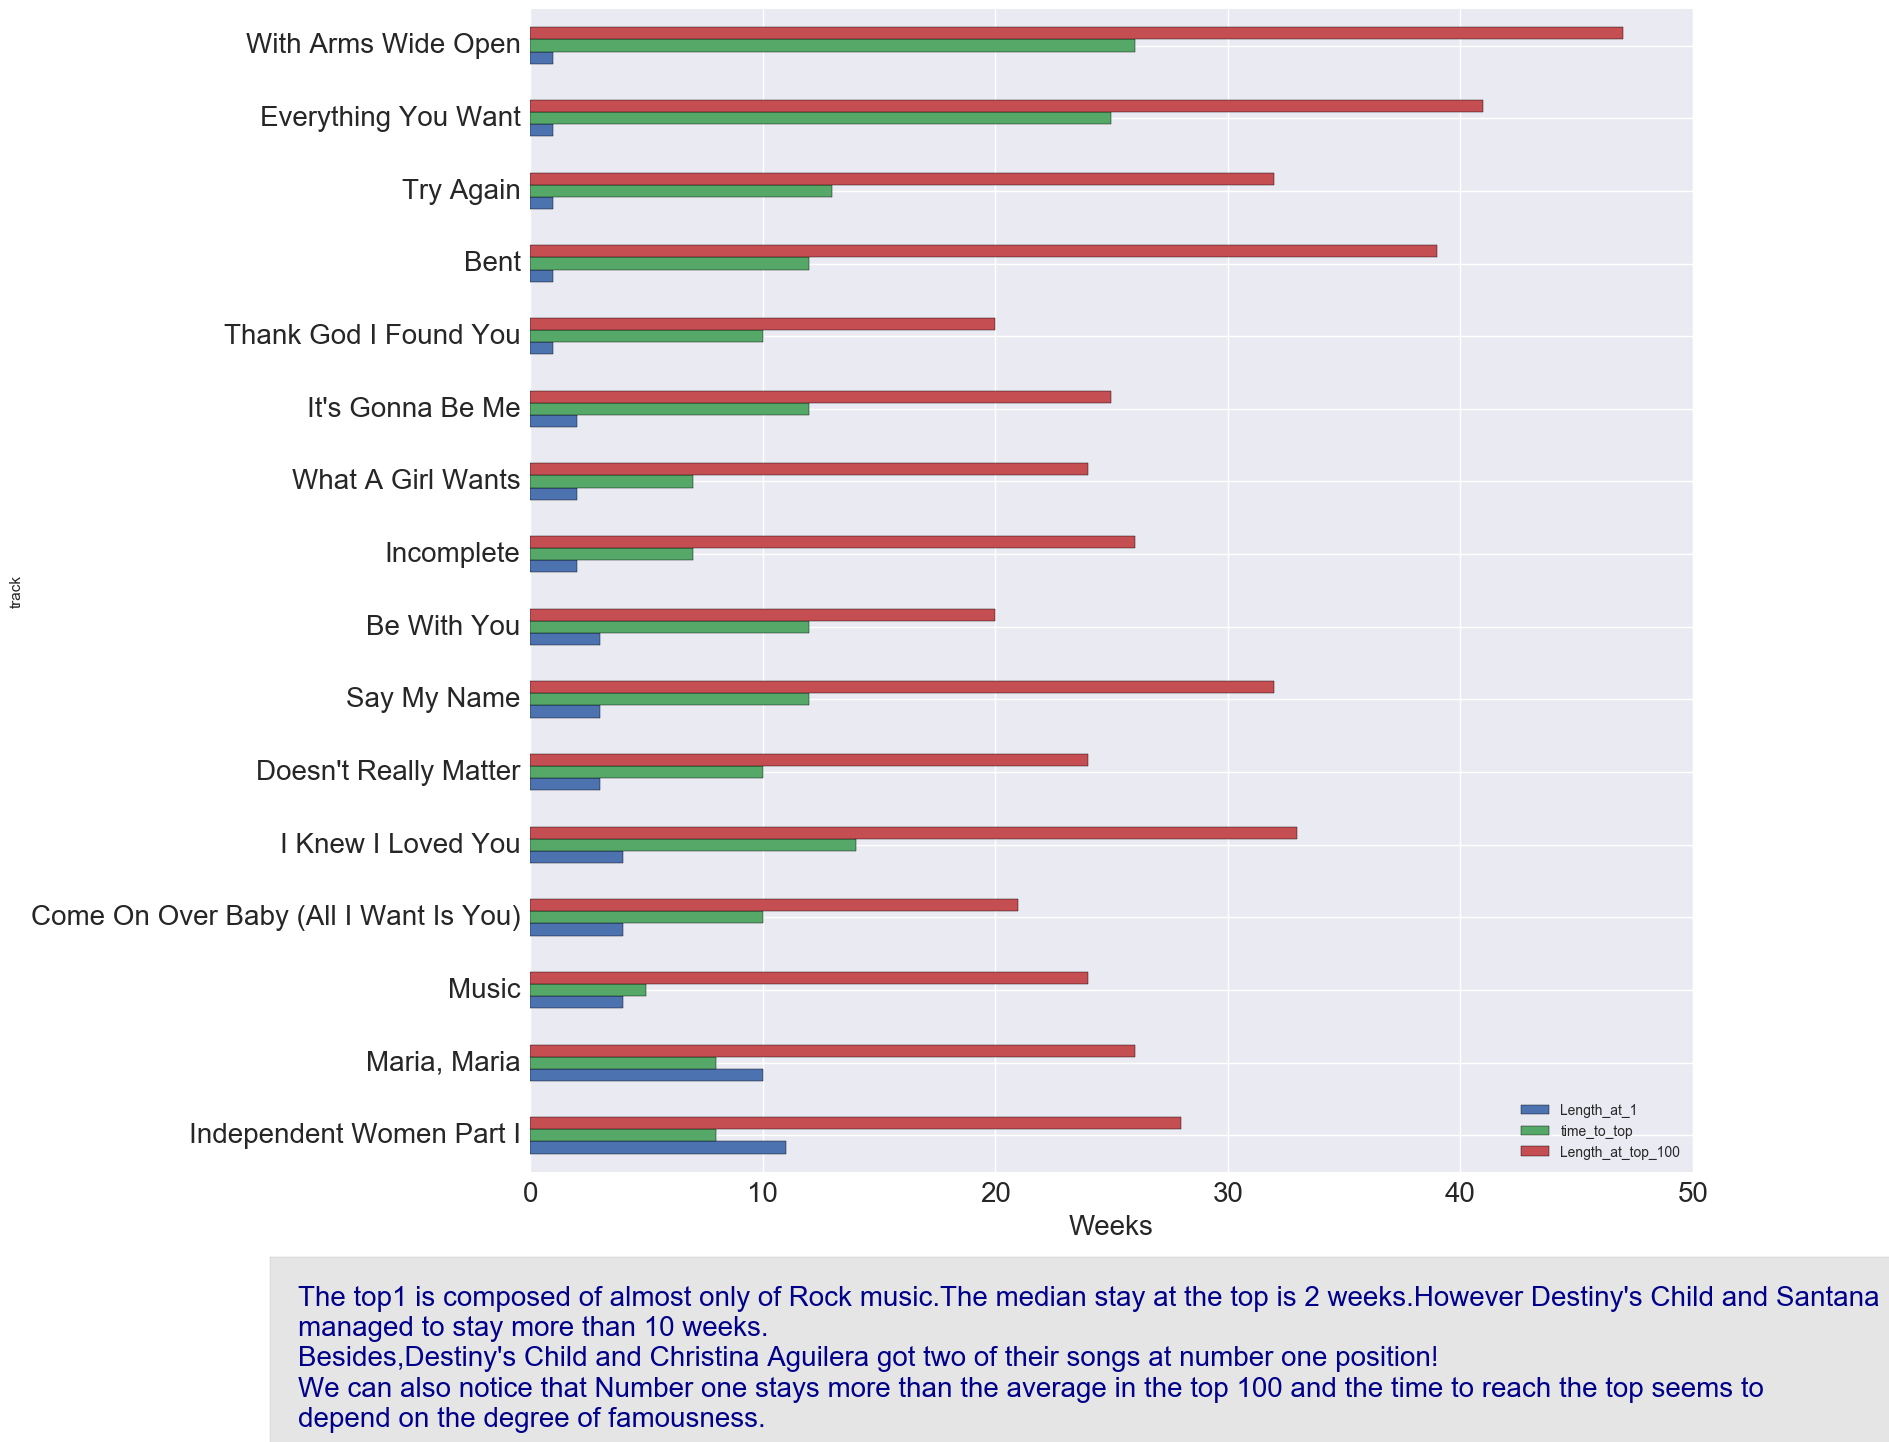

In [33]:
Number1.loc[:,['Length_at_1','time_to_top','Length_at_top_100']].plot(kind='barh',figsize=(15,15),fontsize=20)
median_1=np.median(Number1["Length_at_1"])
plt.xlabel('Weeks',fontsize=20)
plt.text(-10, -4, "The top1 is composed of almost only of Rock music.The median stay at the top is %d weeks.\
However Destiny's Child and Santana\nmanaged to stay more than 10 weeks.\n\
Besides,Destiny's Child and Christina Aguilera got two of their songs at number one position!\n\
We can also notice that Number one stays more than the average in the top 100 and the time to reach the top seems to \ndepend on the degree of famousness."\
%(median_1), fontsize=20,\
         color='Darkblue',
        bbox={'facecolor':'grey', 'alpha':0.2, 'pad':20})

plt.show()

## Idea of problem statement

From the exploration, two points are interesting to look at for a record companies who want to follow their bands.

1) Do they have to put more marketing efforts for that band? _A study of the similarity with Pareto distribution is required._

2) How will perform the new single/album of that band? _A study of the correlation between famousness and ranking is required._

__**Similarity with Pareto distribution for time to reach the top**__

Process:  
* Find the alpha coefficient by iteration which creates the closest curve to the tendency curve of our distribution;  
* Analyse the error with z-test or t-test;  
* If positive tests, perform predictions for other years top 100 and compare it.


__**Degree of famousness over the ranking**__

Process:  
* Look at several years data;
* Create a degree of famousness:
    * Whenever an artist enter to the top100 chart, the coefficient increase by one;  
    * If this is the second song of the same album, coefficient will increase by 0,5;  
    * If the artist reach top 5, coefficient increase by 1;    
    * If the artist stay less than 1 week, coeeficient decrease by one.  
* Try to design a prediction of appeareance in the top 100 and top 10 for a new album or new single.